In [5]:
run all_utils.ipynb

In [6]:
## test on root -> 2 citations - > 4 citations (7 papers)
## this will be a dummy code 
## code block needed 
from networkx.readwrite import json_graph
import json
import networkx as nx
from matplotlib import pylab as pl
from itertools import combinations 
def get_data(paper_where):
        
    base_url = 'https://www.semanticscholar.org'
    filter_ = '?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations'
    print(base_url+paper_where+filter_)
    soup = get_shemantic_paper_html(paper_where)
    data = extract_data(soup)
    #print(data)
    corpus_id = ''.join(data['corpus_id'].split(' '))
    data_api = get_semantic_scholar_paper_by_api(corpus_id)
    
    abstract = data_api['abstract']
    topics = data['topics']
    title = data['title']
    citations =  [cit['link'] for cit in data['citations'][:2]] ## get 2 citation per paper
    #print(topics)
    return topics,title , abstract ,citations
    
    ## get data 
    
    #return  topics
def make_graph_from_abstarct(abstract):
    '''
    generate graph with weights and betweenss from abstarct text 
    args : abstract string 
    return : nx graph 
    '''
    text_network = create_graph(abstract)
    text_network = calculate_central_nodes(text_network,max_nodes = -1)
    return text_network

def procees_topics(topics_raw):
    '''
    procees topics stings to have same format as full graph nodes
    
    args : raw  topic list from api 
    return : cleaned list of topics 
    '''
    topics_words = ((' '.join(topics_raw)).translate(str.maketrans('', '', string.punctuation))).split(' ')
    top = preprocess(topics_words)
    return top
    
def filter_graph(full_graph,topics):
    '''
    process topics list then filter full graph giben topics nodes and merging edges 
    '''
    graph = nx.Graph()
    return filtred_graph




def get_topic_nodes_in_full_g(topics,graph):
    topics_f = procees_topics(topics)
    return list(set(topics_f).intersection(set(list(graph.nodes))))


def all_pairs_From(list_):
    return list(combinations(list_ , 2)) 
def get_Sp(pair,graph ,topics_f):
    is_edgeable = False
    ## get s path
    path = nx.shortest_path(graph,source=pair[0],target=pair[1], weight='distance')
    ## check if path nodes in topics_list
    non_terminal_nodes = path[1:-1]
    is_edgeable = (list(set(non_terminal_nodes).intersection(set(list(topics_f)))) == []) | (non_terminal_nodes==[])
    return path , is_edgeable
def compute_edge_from_path(path,graph):
    #print(path)
    pairs_ = list(zip(path, path[1:] + path[:1]))[:-1] ## delete last couple that link terminal nodes
    #print(pairs_)
    weights = [graph[pair_[0]][pair_[1]]['weight'] for pair_ in pairs_]
    #print(weights)
    edge_weight=0
    for w in weights : 
        edge_weight+=1/w
 
    return 1/edge_weight , (path[0],path[-1])
    

def topic_graph(abstract,topics,title):
    ## main 
    edge_list = []
    text_network = create_graph(abstract)
    topics = topics + title.split(' ')
    #print(topics)
    ## only on topic words that are in abtract (maybe we can have null edge nodes in future ...)
    topics_f = get_topic_nodes_in_full_g(topics,text_network)
    
    pairs = all_pairs_From(topics_f)
    
    for pair in pairs : 
        path , is_edgeable = get_Sp(pair,text_network,topics_f)
    
        if is_edgeable : 
    
            w,nodes = compute_edge_from_path(path,text_network)
            edge_list.append((nodes[0], nodes[1], {"weight": w}))
    
    G = nx.Graph(edge_list) 
    return G
        
def plot_graph(graph):
    pl.figure()
    nx.draw_networkx(graph)
    pl.show()


def export_graph(graph_dict):
    data = json_graph.node_link_data(graph_dict['graph'])
    path = './graph-ui/src/data/'+graph_dict['title']+'.json'
    with open(path, 'w') as outfile:
        json.dump(data, outfile)
    
def write_title(title):
    with open('./graph-ui/src/data/index.json') as json_file:
        data = json.load(json_file)
       ## print(data['graphs'])
        list_ = data['graphs']
    with open('./graph-ui/src/data/index.json','w') as json_file:
    
        list_ = list_+[title]    
        json.dump({'graphs':list_}, json_file) 
    return 'written'

depth =  0
https://www.semanticscholar.org/paper/Playing-Atari-with-Deep-Reinforcement-Learning-Mnih-Kavukcuoglu/2319a491378867c7049b3da055c5df60e1671158?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:15238391
topics :  ['Reinforcement learning', 'Atari', 'Convolutional neural network', 'Deep learning', 'Q-learning', 'Artificial neural network', 'Bellman equation', 'Algorithm', 'Pixel']
citations :  ['/paper/Distributed-Deep-Q-Learning-Ong-Chavez/4eb082956ea3f9b2d83936c41893e385d8cf8918', '/paper/Deep-Reinforcement-Learning-With-Macro-Actions-Durugkar-Rosenbaum/2e2776e4dd0800dc49bb594ae532a236b0acf8ea']


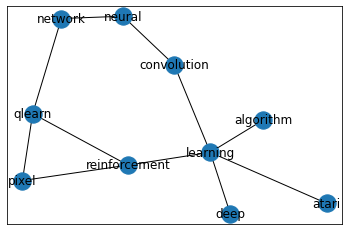

---------------------------------------
depth =  1
https://www.semanticscholar.org/paper/Distributed-Deep-Q-Learning-Ong-Chavez/4eb082956ea3f9b2d83936c41893e385d8cf8918?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:335836
topics :  ['Reinforcement learning', 'Q-learning', 'Convolutional neural network', 'Pixel', 'TensorFlow', 'Deep learning', 'Software framework', 'Artificial neural network', 'Bellman equation', 'Distributed', 'Deep', 'Q-Learning']


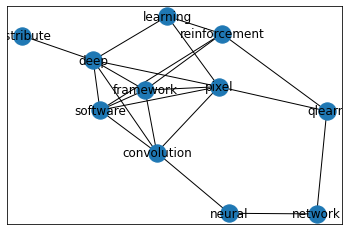

https://www.semanticscholar.org/paper/Deep-Reinforcement-Learning-With-Macro-Actions-Durugkar-Rosenbaum/2e2776e4dd0800dc49bb594ae532a236b0acf8ea?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:10778973
topics :  ['Reinforcement learning', 'Atari', 'Closed-loop transfer function', 'Sparse matrix', 'Deep', 'Reinforcement', 'Learning', 'With', 'Macro-Actions']


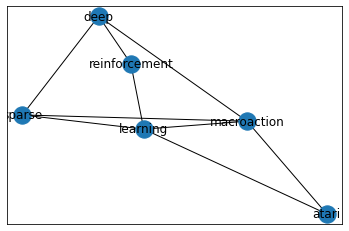

---------------------------------------
depth =  2
https://www.semanticscholar.org/paper/Asynchronous-Methods-for-Deep-Reinforcement-Mnih-Badia/69e76e16740ed69f4dc55361a3d319ac2f1293dd?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:6875312
topics :  ['Reinforcement learning', 'Artificial neural network', 'Deep learning', 'Gradient descent', 'Atari', 'Machine learning', 'Mathematical optimization', 'Multi-core processor', 'Central processing unit', 'Algorithm', 'Asynchronous', 'Methods', 'for', 'Deep', 'Reinforcement', 'Learning']


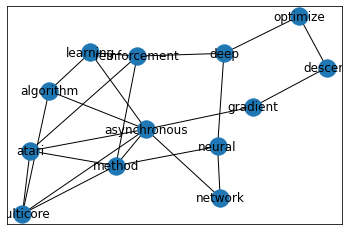

https://www.semanticscholar.org/paper/Transfer-Learning-Approach-for-Fast-Convergence-of-Shao-Jiang/f97aeeb308c6841bf7293edbaaa77f181b96e78d?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:57027161
topics :  ['Reinforcement learning', 'Approximation', 'Feature extraction', 'Applications of artificial intelligence', 'Deep learning', 'Bellman equation', 'Simulation', 'Artificial neural network', 'Transfer', 'Learning', 'Approach', 'for', 'Fast', 'Convergence', 'of', 'Deep', 'Q', 'Networks', 'in', 'Game', 'Pong']


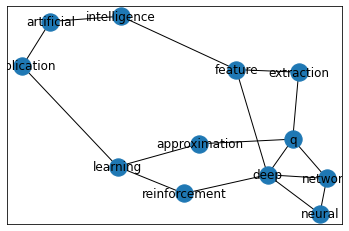

https://www.semanticscholar.org/paper/Learning-to-Repeat%3A-Fine-Grained-Action-Repetition-Sharma-Lakshminarayanan/2ad53229b33ddfd3447045ea28c4a0687747b6b0?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:15294098
topics :  ['Reinforcement learning', 'TORCS', 'Trust region', 'Atari', 'Behavioral pattern', 'Search algorithm', 'Interaction', 'Algorithmic learning theory', 'Machine learning', 'Color gradient', 'Learning', 'to', 'Repeat:', 'Fine', 'Grained', 'Action', 'Repetition', 'for', 'Deep', 'Reinforcement', 'Learning']


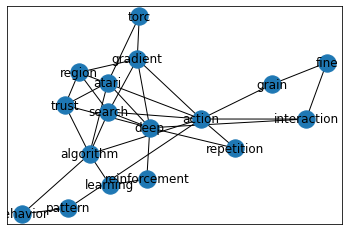

https://www.semanticscholar.org/paper/Macro-Action-Reinforcement-Learning-with-Sequence-Heecheol-Yamada/6d7ca5e4ea385920b0508dfb80789d74740cbb3b?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:85459437
topics :  ['Reinforcement learning', 'Autoencoder', 'Curse of dimensionality', 'Machine learning', 'Algorithm', 'Learning Disorders', 'Exhibits as Topic', 'Perseveration', 'Apache Axis', 'Variational principle', 'Macro', 'Action', 'Reinforcement', 'Learning', 'with', 'Sequence', 'Disentanglement', 'using', 'Variational', 'Autoencoder']


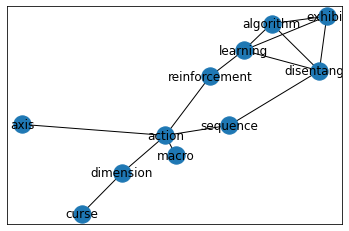

---------------------------------------
depth =  3
https://www.semanticscholar.org/paper/Accelerated-Methods-for-Deep-Reinforcement-Learning-Stooke-Abbeel/67ee02edb5d969c0657314ed6c1a6ed62121ac29?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:3719116
topics :  ['Reinforcement learning', 'Graphics processing unit', 'Algorithm', 'Nvidia DGX-1', 'Artificial neural network', 'Parallel computing', 'Atari', 'Gradient descent', 'Machine learning', 'Sample complexity', 'Unified Framework', 'Computation', 'Experiment', 'Computer', 'Simulation', 'Central processing unit', 'Accelerated', 'Methods', 'for', 'Deep', 'Reinforcement', 'Learning']


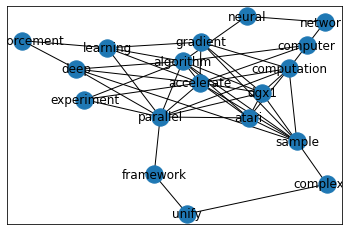

https://www.semanticscholar.org/paper/Efficient-Parallel-Methods-for-Deep-Reinforcement-Clemente-Mart%C3%ADnez/9dc79a0c17bb8983c15d0e6d842bf54ee523f083?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:12305178
topics :  ['Reinforcement learning', 'Algorithm', 'Atari', 'Parallel computing', 'Graphics processing unit', 'Gradient', 'Open-source software', 'Machine learning', 'Problem domain', 'Parallel programming model', 'Actor model', 'Efficient', 'Parallel', 'Methods', 'for', 'Deep', 'Reinforcement', 'Learning']


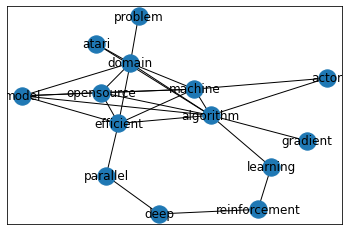

https://www.semanticscholar.org/paper/Distributed-Deep-Q-Learning-Ong-Chavez/4eb082956ea3f9b2d83936c41893e385d8cf8918?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:335836
topics :  ['Reinforcement learning', 'Q-learning', 'Convolutional neural network', 'Pixel', 'TensorFlow', 'Deep learning', 'Software framework', 'Artificial neural network', 'Bellman equation', 'Distributed', 'Deep', 'Q-Learning']


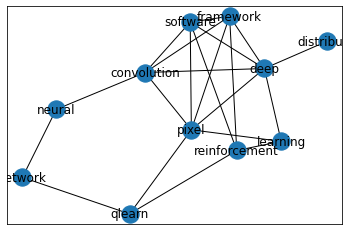

https://www.semanticscholar.org/paper/Neural-Fitted-Q-Iteration-First-Experiences-with-a-Riedmiller/282001869bd502c7917db8b32b75593addfbbc68?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:6921329
topics :  ['Reinforcement learning', 'Supervised learning', 'Artificial neural network', 'Benchmark (computing)', 'Iteration', 'Multilayer perceptron', 'Algorithm', 'Bellman equation', 'Interaction', 'Display resolution', 'Neural', 'Fitted', 'Q', 'Iteration', '-', 'First', 'Experiences', 'with', 'a', 'Data', 'Efficient', 'Neural', 'Reinforcement', 'Learning', 'Method']


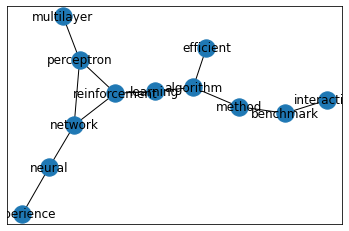

https://www.semanticscholar.org/paper/Construction-of-Macro-Actions-for-Deep-Learning-Chang-Chang/5a44e0877ae4d3b6322164a02d204429604e3daf?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:199442521
topics :  ['Reinforcement learning', 'Genetic algorithm', 'Experiment', 'Speedup', 'Goto', 'Action potential', 'Construction', 'of', 'Macro', 'Actions', 'for', 'Deep', 'Reinforcement', 'Learning']


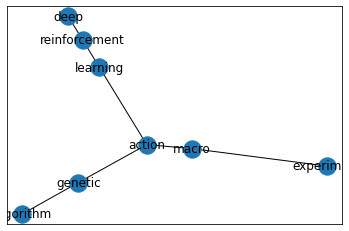

https://www.semanticscholar.org/paper/Learning-to-Factor-Policies-and-Action-Value-Action-Sharma-Suresh/699d3449b82a635d4fbdf3b0946d31b4d78f0cea?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:2865385
topics :  ['Reinforcement learning', 'Basis (linear algebra)', 'Algorithm', 'Driven right leg circuit', 'Atari', 'Q-learning', 'Programming paradigm', 'Algorithmic learning theory', 'Learning', 'to', 'Factor', 'Policies', 'and', 'Action-Value', 'Functions:', 'Factored', 'Action', 'Space', 'Representations', 'for', 'Deep', 'Reinforcement', 'learning']


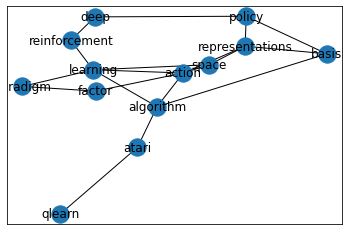

https://www.semanticscholar.org/paper/Construction-of-Macro-Actions-for-Deep-Learning-Chang-Chang/5a44e0877ae4d3b6322164a02d204429604e3daf?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:199442521
topics :  ['Reinforcement learning', 'Genetic algorithm', 'Experiment', 'Speedup', 'Goto', 'Action potential', 'Construction', 'of', 'Macro', 'Actions', 'for', 'Deep', 'Reinforcement', 'Learning']


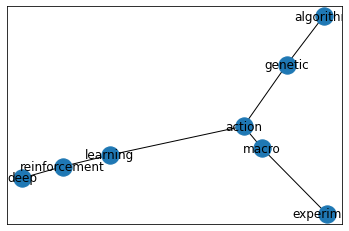

https://www.semanticscholar.org/paper/Reusability-and-Transferability-of-Macro-Actions-Chang-Chang/b5f25ad562fed0825635a461269409f43ce85b72?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:226281609
topics :  ['Reusability', 'and', 'Transferability', 'of', 'Macro', 'Actions', 'for', 'Reinforcement', 'Learning.']


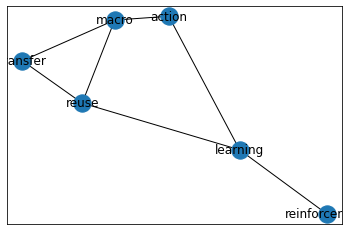

---------------------------------------


['written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written']

In [7]:
## test __main__
## root paper 

graphs_list = [ ]
n_iter = 3
print('depth = ' , 0 )
## root paper 
root_url = '/paper/Playing-Atari-with-Deep-Reinforcement-Learning-Mnih-Kavukcuoglu/2319a491378867c7049b3da055c5df60e1671158'
topics ,title, abstract,citations= get_data(root_url)
print('topics : ',topics)
print('citations : ', citations)
graph = topic_graph(abstract,topics,title)
graphs_list.append({'title':title,'graph':graph})
plot_graph(graph)
print('---------------------------------------')
for i in range(n_iter):
    print('depth = ' , i+1 )
    cit_all = [] 
    for cit_link in citations : 
        topics_ ,title_, abstract_,citations_= get_data(cit_link)
        print('topics : ',topics_+title_.split(' '))
        #print('citations : ', citations_)
        graph = topic_graph(abstract_,topics_,title_)
        plot_graph(graph)
        graphs_list.append({'title':title_,'graph':graph})
        cit_all = cit_all +citations_ 
    citations = cit_all 
        
    print('---------------------------------------')
        
## export graphs
[export_graph(graphs_dic) for graphs_dic in graphs_list ]

[write_title(graphs_dic['title']) for graphs_dic in graphs_list ]

In [22]:
write = [ write_title(graphs_dic['title']) for graphs_dic in graphs_list ] 

In [47]:
## to do 
## do section 2 : merge graphs : weighting summation (for one graph distance + occurence ) and when merging
## how can we enphasis occurence again ? (0.33 << 4)


In [4]:
[write_title(graphs_dic['title']) for graphs_dic in graphs_list ]


['written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written']

In [27]:
export_graph('jsgraph.json')

[]
